# Week 1: Data splitting strategies (Video part 24)


- Situation: Time series prediction eg, Predict the number of customer for a shop next month.
- Two possible data splitting strategies:
1. Random rows for validation (top in the image)
2. Time-based split (bottom)

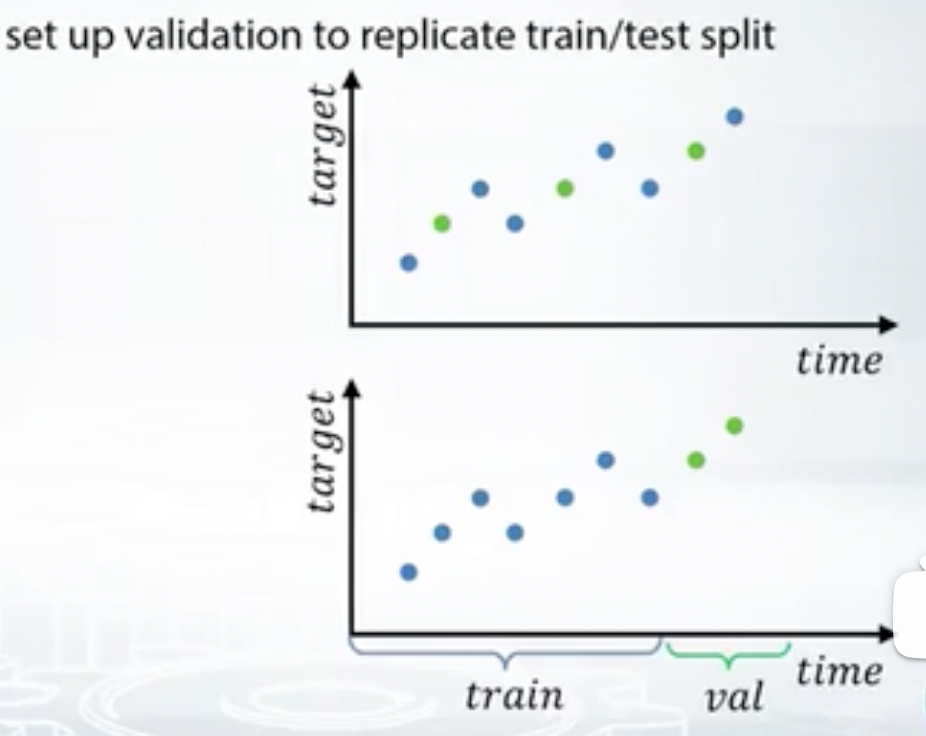
- How to create features for both splits?
1. For random rows validation set
   - Interpolate between previous and next value to get our prediction
   - But, do we really have future information about the number of customers in the real world? Maybe not
   - For this model, the previous and next target value will have highest impact on model prediction. If we train this model and use it in production, we will have to provide the previous and next value to get prediction, but in real world, there is no information about how many customers we will get tomorrow - so we give nan, but this means the prediction will be very bad.
2. For time-based split
   - The most useful features (highest impact) are time-based trends features eg what was the trend in the last couple of months or weeks?
   - This model will be able to predict many points ahead and it will not use adjacent target values.
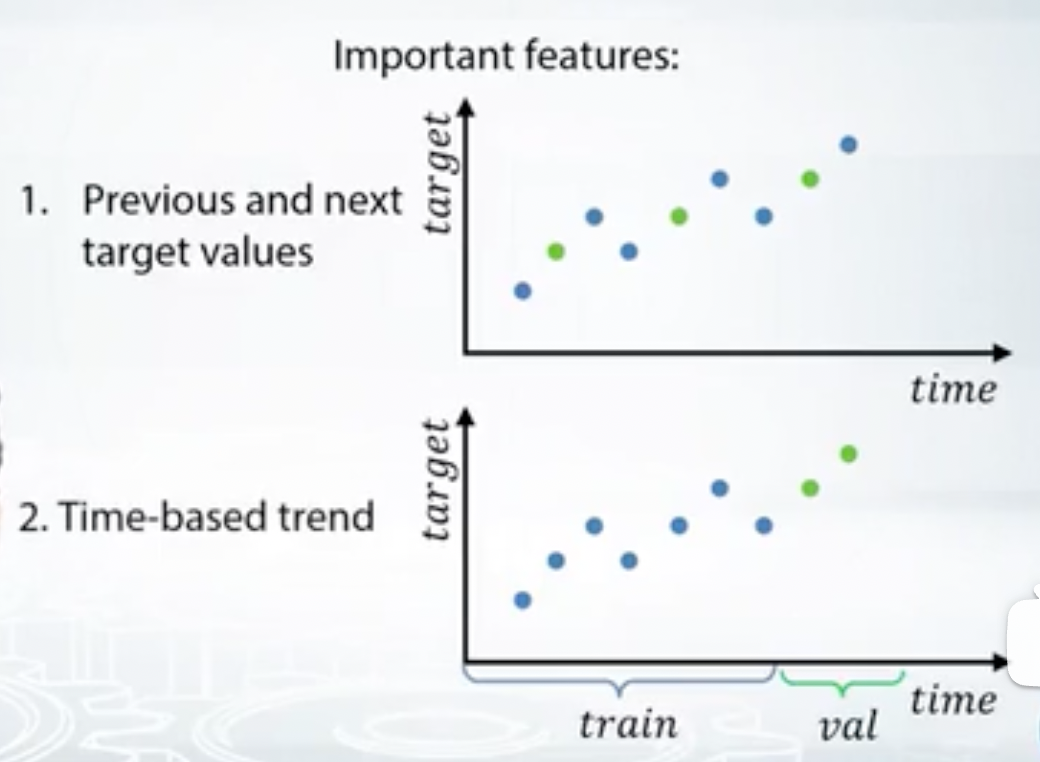
- Conclusion:
  - Two types of validation split above differ significantly, the most useful features for one model might be useless for another.

------
- Situation: Can we use randomly split validation strategy on time-based trend features? Consider the case when target has a linear trend.
1. Randomly choosen train, validation and test (left):
   - Notice that the model prediction will be close to the target average value calculated using train data because the validation and train set share similar linear trend.
   - But the test set average target value for test set is much further away to the average value of train set, so we will have better score on validation set than on test set.
   - This can lead to false expectation.
2. Time-based split for validation and test set (Right):
   - Score for validation set will be similar to test set.
- Conclusion:
    - Incorrect validation strategy can lead to unrealistic estimation of validation/test score because of the subset of choosen target values.
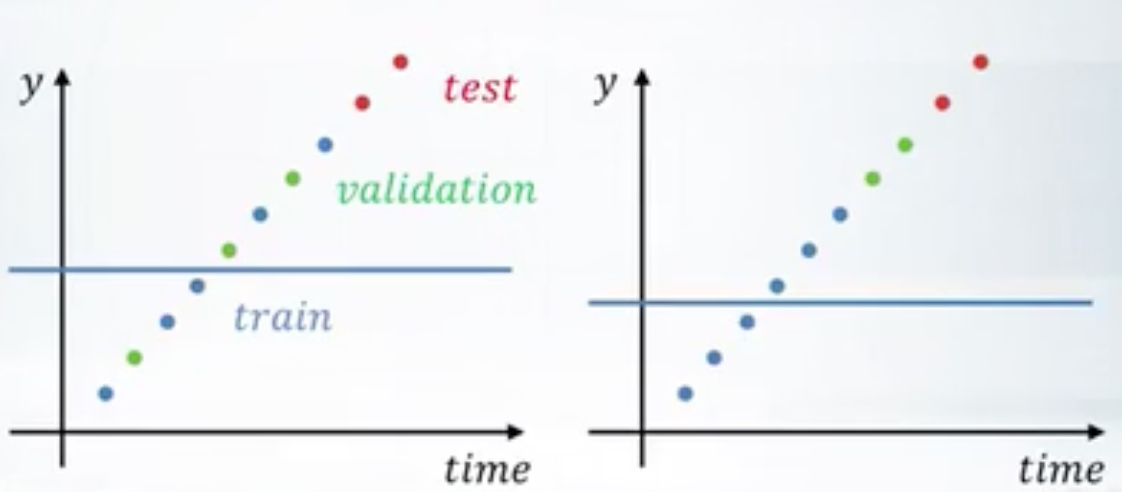

## Most competitions can be split into 3 split categories:
1. Random, row-wise
2. Time-wise
3. By ID
4. Combined

### (1) Random split
- Most common.
- Usually means rows are independent of each other eg, to predict if a user will pay their subscription fee.
- Let's consider some kind of dependency in the above example:
  - There are family members within our customers. We can perhaps assume that if a user can pay their subscription, their family member might also be able to.
  - If due to our splitting, the user ends up in the train data and their family member in another, we can probably make a special feature for this kind of cases.
 
### (2) Time-based split
- Generally split by date - everything before a certain date as train set, and everything after as test set.
- If we are to predict the number of customers for the shop for each day in the next week, we can create features like:
  - The number of customers for the same day in the previous week
  - The average number of customers in the past month
- Special case for time-based split validation is moving window validation
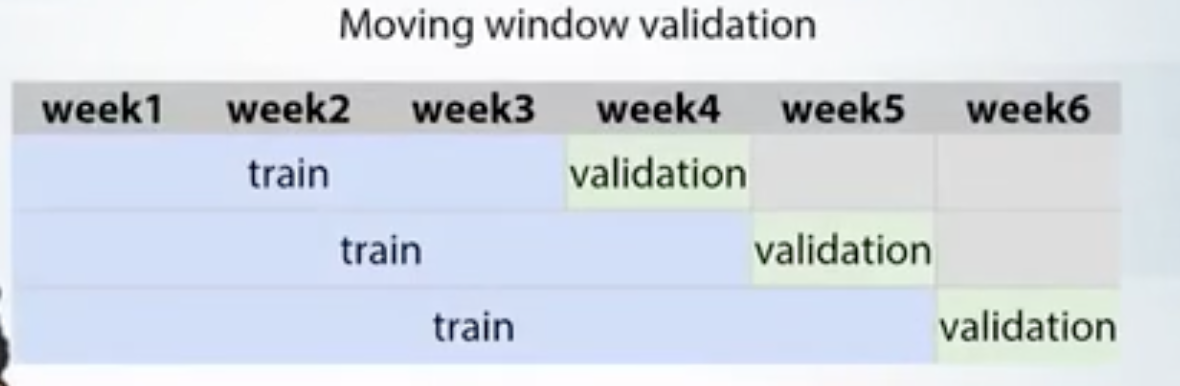

### (3) ID-based split
- ID can be a unique identifier of user, shop and other entity
- For example, if we need to provide music recommendations for completely new users.
  - We may have different set of users in the train and test set.
  - So features based on user's history eg how many song user listen to last week, will not help for completely new users
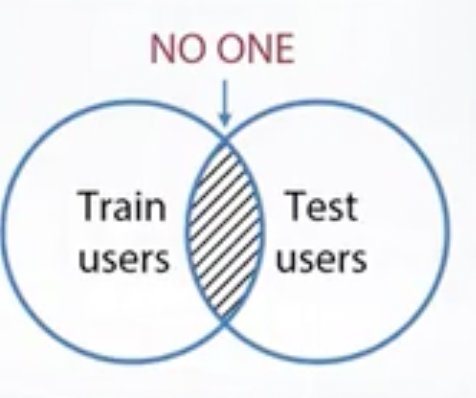

### (4) Combined
- Example 1: If we need to predict sales for several shops, we can choose to split by date for each shop independently instead of using one date for every shop in the data.
- Example 2: If we have search queries from multiple users using several search engines, we can split by a combination of user ID and search engine ID.
- Example 3: If we want to estimate search result relevancy from keywords and the train data consisted of seach terms and search results for those terms but test set contained completely new search terms.
  - We couldn't use random split here because it will produce a complicated model and can lead to overfitting.
  - We couldn't use term-based split for validation because it will produce an underfitting model.
  - To select an optimal model, it is important to mimic the ratio of new search terms from train/test split.

# What I learnt:
- If train/test split does not match train/validation split, we are going to make a useless model. So we need to set up validation to mimic train/test split.
- Different splitting strategies can differ significantly:
  - in the generated features
  - in the way the model will rely on that features
  - in some kind of target leak
- Logic of feature generation depends on the data splitting strategy
- Competition tips:
  - To be able to find smart ideas for feature generation and to consistently improve our model, we need to identify train/test split made by organizers and reproduce it.